In [1]:
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
import os

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('../data/train_test/anxiety_train.csv')

In [3]:
X = data.drop(columns='Anxiety_Group')

y = data['Anxiety_Group']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

In [5]:
svc_model = SVC(random_state=42)

In [6]:
param_grid = {
    'C': [0.01, 0.1, 1], # La fuerza de la regularización. Un C más pequeño especifica una regularización más fuerte.
    'kernel': ['rbf', 'poly', 'linear'] # Tipo de función kernel
}

In [7]:
grid = GridSearchCV(
    svc_model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [8]:
grid.fit(X_train, y_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['rbf', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [15]:
best_svc_model = grid.best_estimator_
print(f"Mejores Hiperparámetros: {grid.best_params_}")

Mejores Hiperparámetros: {'C': 1, 'kernel': 'linear'}


In [16]:
y_pred = best_svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print(accuracy)

0.9516371282667467


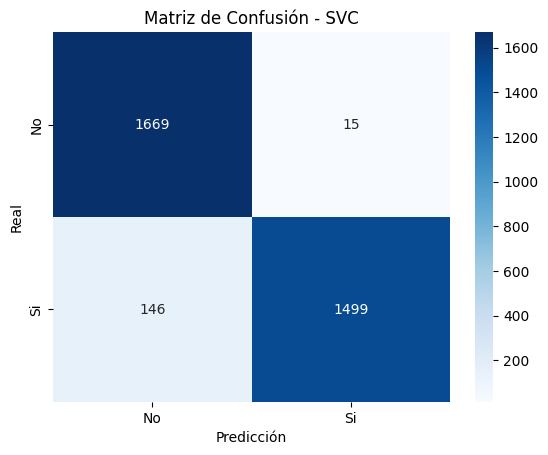

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - SVC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [13]:
results = pd.DataFrame(grid.cv_results_)
results['param_C'] = results['param_C'].astype(float)
results['param_kernel'] = results['param_kernel'].astype(str)

In [14]:
'''plt.figure(figsize=(8,6))
for kernel in results['param_kernel'].unique():
    subset = results[results['param_kernel'] == kernel]
    plt.plot(subset['param_C'], subset['mean_test_score'],
             marker='o', label=f"kernel={kernel}")

plt.title("Accuracy medio vs C (según kernel)")
plt.xlabel("C (Regularización)")
plt.ylabel("Mean CV Accuracy")
plt.legend()
plt.grid(True)
plt.show()'''

'plt.figure(figsize=(8,6))\nfor kernel in results[\'param_kernel\'].unique():\n    subset = results[results[\'param_kernel\'] == kernel]\n    plt.plot(subset[\'param_C\'], subset[\'mean_test_score\'],\n             marker=\'o\', label=f"kernel={kernel}")\n\nplt.title("Accuracy medio vs C (según kernel)")\nplt.xlabel("C (Regularización)")\nplt.ylabel("Mean CV Accuracy")\nplt.legend()\nplt.grid(True)\nplt.show()'

In [20]:
models = '../models'
best_model = grid.best_estimator_
final_model_path = os.path.join(models, 'modelo_svc.pkl')
joblib.dump(best_model, final_model_path)
print(f"Modelo final guardado en: {final_model_path}")

Modelo final guardado en: ../models\modelo_svc.pkl
